<a href="https://colab.research.google.com/github/raviakasapu/DeepLearningPyTorch/blob/main/02_PyTorch_Classification_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Neural Network Classfication

https://www.youtube.com/watch?v=Z_ikDlimN6A

In [2]:
import sklearn
from sklearn.datasets import make_circles

In [3]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
len(X), X.shape,len(y), y.shape

(1000, (1000, 2), 1000, (1000,))

In [5]:
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [6]:
import pandas as pd
import numpy as np

In [7]:
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "lable": y
                        }
                       )
circles.head(10)

,X1,X2,lable
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

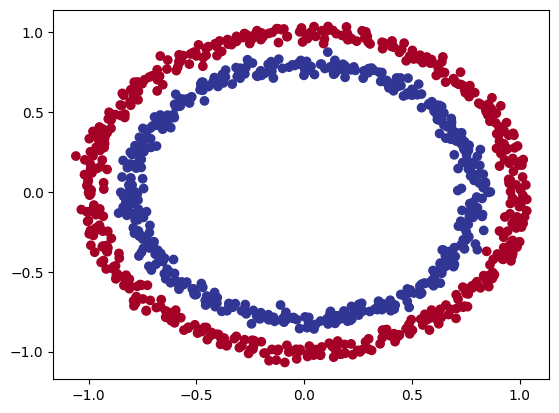

In [9]:
plt.scatter(x=circles["X1"],
            y=circles["X2"],
            c=y,
            cmap=plt.cm.RdYlBu)

In [10]:
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
import torch
from torch import nn

In [12]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [16]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self,x):
    return self.layer_2(self.layer_1(x))

model_0 = CircleModel().to(device)

In [17]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [18]:
 model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
 ).to(device)

In [19]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2476,  0.0069],
                      [-0.0954,  0.2441],
                      [-0.2823, -0.1845],
                      [ 0.5634, -0.2464],
                      [ 0.6846,  0.5535]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4818, -0.3043, -0.3669,  0.1041,  0.2153], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1163, -0.4321, -0.1243, -0.4373, -0.2965]], device='cuda:0')),
             ('1.bias', tensor([0.4333], device='cuda:0'))])

In [21]:
with torch.inference_mode():
  initial_preds = model_0(X_test.to(device))
initial_preds.shape

torch.Size([200, 1])

Text(0.5, 1.0, 'prediction results with untrained data')

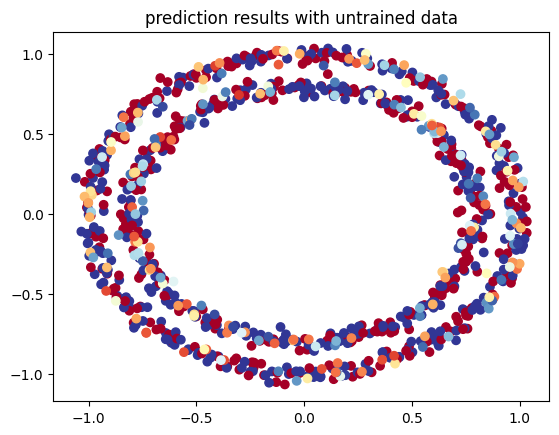

In [22]:
plt.scatter(x=circles["X1"],
            y=circles["X2"],
            c=np.append(y_train,initial_preds.to("cpu").numpy()),
            cmap=plt.cm.RdYlBu)
plt.title("prediction results with untrained data")

In [23]:
#loss_fn = nn.BCELoss()
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1)

In [24]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [25]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits.shape,y_logits[0:5,]

(torch.Size([200, 1]),
 tensor([[0.6125],
         [0.4168],
         [0.8835],
         [0.5368],
         [0.4993]], device='cuda:0'))

In [26]:
y_prediction_probabilities = torch.sigmoid(y_logits)
y_prediction_probabilities[0:5,]

tensor([[0.6485],
        [0.6027],
        [0.7075],
        [0.6311],
        [0.6223]], device='cuda:0')

In [27]:
y_predicted_lables = torch.round(y_prediction_probabilities)
y_predicted_lables[0:5,]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

In [28]:
X_train[:10,0]

tensor([ 0.6579,  0.6319, -1.0086, -0.9666, -0.1666, -0.8837, -0.3836,  0.6047,
        -0.5869,  0.8833])

In [29]:
y_logits[:10,]

tensor([[0.6125],
        [0.4168],
        [0.8835],
        [0.5368],
        [0.4993],
        [0.3828],
        [0.1363],
        [0.1273],
        [0.8993],
        [0.3995]], device='cuda:0')

In [30]:
epochs = 1000
torch.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  accuracy = accuracy_fn(y_true=y_train,
                         y_pred=y_pred)
  
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_accuracy = accuracy_fn(y_true=y_test,
                                 y_pred=test_pred)
    
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss:{loss:.5f} | Accuracy {accuracy:.2f}% | test_loss:{test_loss:.5f} | test_accuracy:{test_accuracy:.2f}%")

Epoch: 0 | Loss:0.74203 | Accuracy 50.00% | test_loss:0.72820 | test_accuracy:50.00%
Epoch: 100 | Loss:0.69435 | Accuracy 50.62% | test_loss:0.69250 | test_accuracy:50.00%
Epoch: 200 | Loss:0.69312 | Accuracy 50.50% | test_loss:0.69373 | test_accuracy:49.50%
Epoch: 300 | Loss:0.69299 | Accuracy 51.12% | test_loss:0.69437 | test_accuracy:47.00%
Epoch: 400 | Loss:0.69298 | Accuracy 50.88% | test_loss:0.69459 | test_accuracy:46.50%
Epoch: 500 | Loss:0.69298 | Accuracy 51.50% | test_loss:0.69466 | test_accuracy:45.50%
Epoch: 600 | Loss:0.69298 | Accuracy 51.50% | test_loss:0.69467 | test_accuracy:45.00%
Epoch: 700 | Loss:0.69298 | Accuracy 51.25% | test_loss:0.69468 | test_accuracy:45.00%
Epoch: 800 | Loss:0.69298 | Accuracy 51.12% | test_loss:0.69468 | test_accuracy:46.00%
Epoch: 900 | Loss:0.69298 | Accuracy 51.12% | test_loss:0.69468 | test_accuracy:46.00%


In [31]:
import requests
from pathlib import Path

import os
import zipfile

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [32]:
#!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

In [33]:
from helper_functions import plot_predictions, plot_decision_boundary

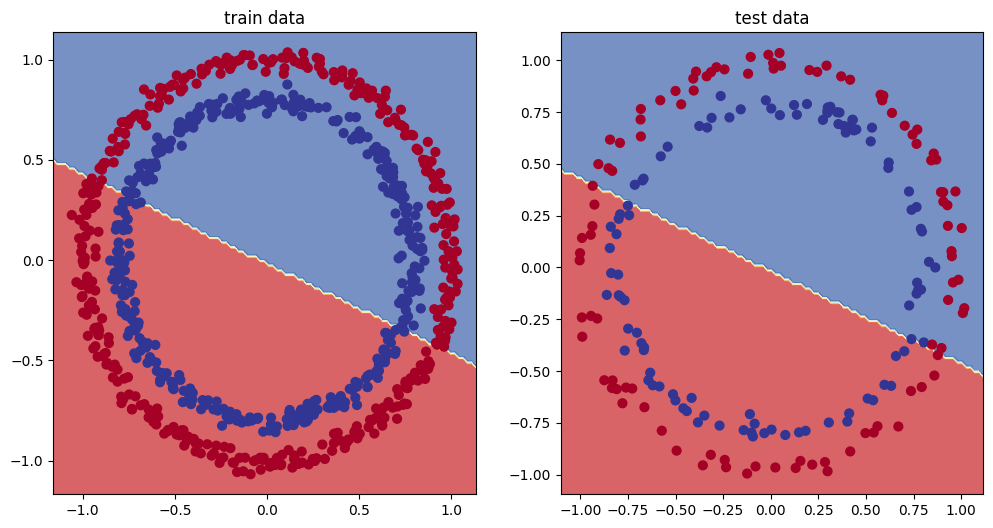

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train data")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test data")
plot_decision_boundary(model_0,X_test,y_test)

In [35]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2723,  0.0153],
                      [-0.2505,  0.1814],
                      [-0.3268, -0.2021],
                      [ 0.3982, -0.3135],
                      [ 0.6092,  0.5213]])),
             ('0.bias', tensor([-0.4801, -0.1624, -0.3299,  0.2576,  0.3039])),
             ('1.weight',
              tensor([[ 0.1607, -0.3835, -0.1535, -0.3534, -0.0424]])),
             ('1.bias', tensor([0.0691]))])

In [36]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self,x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z
    


In [37]:
  model_1 = CircleModelV1().to(device)
  model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [39]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

 
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_accuracy = accuracy_fn(y_true=y_test,
                                 y_pred=test_pred)
    
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss:{loss:.5f} | Accuracy {accuracy:.2f}% | test_loss:{test_loss:.5f} | test_accuracy:{test_accuracy:.2f}%")


Epoch: 0 | Loss:0.69396 | Accuracy 51.00% | test_loss:0.69261 | test_accuracy:51.00%
Epoch: 100 | Loss:0.69305 | Accuracy 51.00% | test_loss:0.69379 | test_accuracy:48.00%
Epoch: 200 | Loss:0.69299 | Accuracy 51.00% | test_loss:0.69437 | test_accuracy:46.00%
Epoch: 300 | Loss:0.69298 | Accuracy 51.00% | test_loss:0.69458 | test_accuracy:45.00%
Epoch: 400 | Loss:0.69298 | Accuracy 51.00% | test_loss:0.69465 | test_accuracy:46.00%
Epoch: 500 | Loss:0.69298 | Accuracy 51.00% | test_loss:0.69467 | test_accuracy:46.00%
Epoch: 600 | Loss:0.69298 | Accuracy 51.00% | test_loss:0.69468 | test_accuracy:46.00%
Epoch: 700 | Loss:0.69298 | Accuracy 51.00% | test_loss:0.69468 | test_accuracy:46.00%
Epoch: 800 | Loss:0.69298 | Accuracy 51.00% | test_loss:0.69468 | test_accuracy:46.00%
Epoch: 900 | Loss:0.69298 | Accuracy 51.00% | test_loss:0.69468 | test_accuracy:46.00%


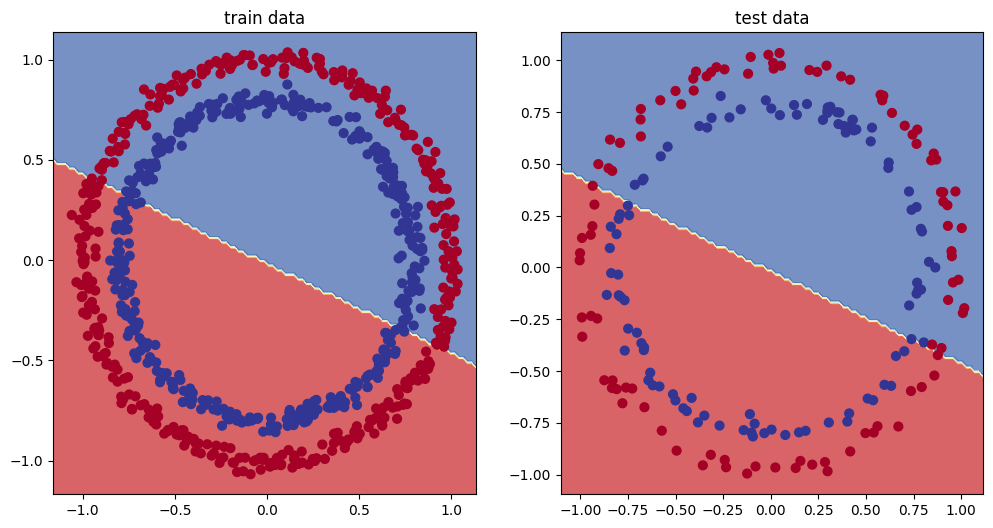

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train data")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test data")
plot_decision_boundary(model_1,X_test,y_test)

# run Model _1 on linear data

In [85]:
bias = 0.7
weight_1 = 0.3
weight_2 = 0.6
weight_3 = 0.9

start = 0
end = 1
step = 0.02

x1 = torch.arange(start, end , step).unsqueeze(dim=1)
x2 = torch.arange(start, end/2 , step/2).unsqueeze(dim=1)
x3 = torch.arange(start, end/0.75 , step/0.75).unsqueeze(dim=1)

y = weight_1 * x1 + weight_2 * x2 + weight_3 * x3 + bias

X = torch.cat((x1,x2,x3), dim=1)
X.shape, y.shape

(torch.Size([50, 3]), torch.Size([50, 1]))

In [86]:
train_split = int(0.8*len(X))
train_split

40

In [87]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [88]:

def plot_multi_visualizations(train_data=X_train,
                        train_labels=y_train,
                        test_data=X_test,
                        test_labels=y_test,
                        predictions=None
                        ):
  plt.figure(figsize=(10,7))
  colors = ["b","g","black"]
  print(train_data.shape[1]-1)
  
  #for dim in train_data.shape[1]:
  #  plt.scatter(train_data[:,dim-1], train_labels, c='r',s=8, label="training data")
  #  plt.scatter(test_data[:,dim-1], test_labels, c="g",s=4, label="testing data")
  plt.scatter(train_data[:,0], train_labels, c='b', marker="o", label="training data_1")
  plt.scatter(train_data[:,1], train_labels, c='b', marker="o", label="training data_2")
  plt.scatter(train_data[:,2], train_labels, c='b', marker="o", label="training data_3")

  plt.scatter(test_data[:,0], test_labels, c="g", marker="D", label="testing data_1")
  plt.scatter(test_data[:,1], test_labels, c="g", marker="D", label="testing data_2")
  plt.scatter(test_data[:,2], test_labels, c="g", marker="D", label="testing data_3")

  if predictions is not None:
    plt.scatter(test_data[:,0], predictions, c="r",marker="*", label="Predictions data")
    plt.scatter(test_data[:,1], predictions, c="r",marker="*", label="Predictions data")
    plt.scatter(test_data[:,2], predictions, c="r",marker="*", label="Predictions data")

  plt.legend(prop={"size":14})
     

2


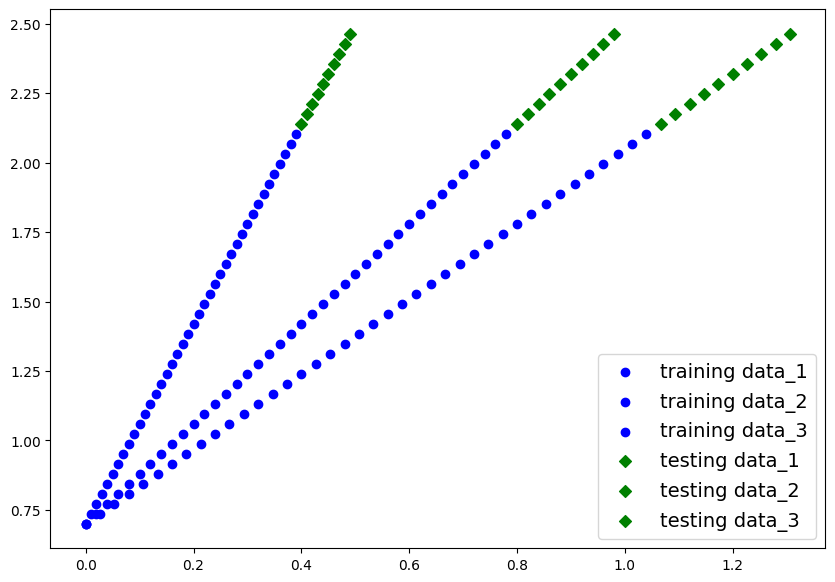

In [89]:
plot_multi_visualizations(X_train.to("cpu").numpy(),y_train.to("cpu").numpy(), X_test.to("cpu").numpy(),y_test.to("cpu").numpy())

In [96]:
class CircleModelV1_liner(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=3, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self,x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z
    


In [97]:
  model_1_linear = CircleModelV1_liner().to(device)
  model_1_linear

CircleModelV1_liner(
  (layer_1): Linear(in_features=3, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [102]:
loss_fn = torch.nn.functional.mse_loss
optimizer = torch.optim.SGD(params=model_1_linear.parameters(), lr=0.01)

In [103]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1_linear.train()

  #y_logits = model_1_linear(X_train).squeeze()
  #y_pred = torch.round(torch.sigmoid(y_logits))
  y_pred = model_1_linear(X_train)

  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

 
  model_1_linear.eval()
  with torch.inference_mode():
    #test_logits = model_1_linear(X_test).squeeze()
    #test_pred = torch.round(torch.sigmoid(test_logits))

    test_pred = model_1_linear(X_test)

    test_loss = loss_fn(test_pred,
                        y_test)

    
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss:{loss:.5f} |  test_loss:{test_loss:.5f} ")


Epoch: 0 | Loss:0.04482 |  test_loss:0.18138 
Epoch: 100 | Loss:0.01943 |  test_loss:0.07638 
Epoch: 200 | Loss:0.00697 |  test_loss:0.02686 
Epoch: 300 | Loss:0.00214 |  test_loss:0.00813 
Epoch: 400 | Loss:0.00059 |  test_loss:0.00223 
Epoch: 500 | Loss:0.00015 |  test_loss:0.00057 
Epoch: 600 | Loss:0.00004 |  test_loss:0.00014 
Epoch: 700 | Loss:0.00001 |  test_loss:0.00004 
Epoch: 800 | Loss:0.00000 |  test_loss:0.00001 
Epoch: 900 | Loss:0.00000 |  test_loss:0.00000 


In [104]:
with torch.inference_mode():
  y_pred_new_multi = model_1_linear(X_test)

2


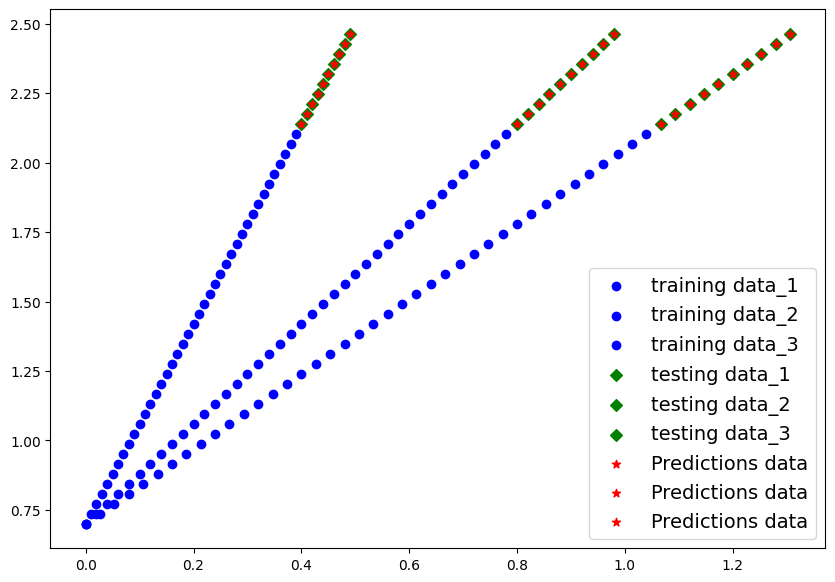

In [107]:
plot_multi_visualizations(X_train.cpu(),y_train.cpu(), X_test.cpu(),y_test.cpu(),predictions=y_pred_new_multi.cpu())